In [36]:
!pip install streamlit
import streamlit as st

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.33.1 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.33.1 which is incompatible.


  Using cached streamlit-1.51.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached protobuf-6.33.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.51.0-py3-none-any.whl (10.2 MB)
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached gitpython-3.1.45-py3-none-any.whl (208 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached protobuf-6.33.1-cp310-abi3-win_amd64.whl (436 kB)
   ---------------------------------------- 0.0/26.2 MB ? eta -:--:--
   --

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier

In [2]:
# set file path
path = r'C:\Users\Salim\Kuliah\Semester 5\Pembelajaran Mesin Statistika\ML-Deployment-Exercise'
data = pd.read_csv(path + r'\Data\DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv')

In [3]:
data.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [4]:
X = data.drop('diabetic', axis=1)
y = data['diabetic']

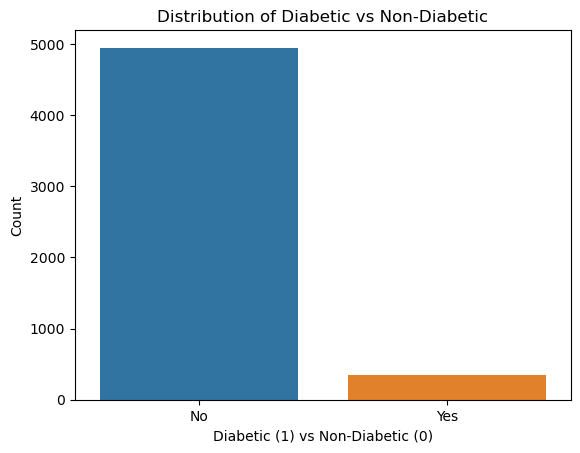

In [5]:
# target distribution
sns.countplot(x=y)
plt.title('Distribution of Diabetic vs Non-Diabetic')
plt.xlabel('Diabetic (1) vs Non-Diabetic (0)')
plt.ylabel('Count')
plt.show()

In [18]:
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)

In [26]:
X = data.drop('diabetic', axis=1)
y = data['diabetic']

In [27]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

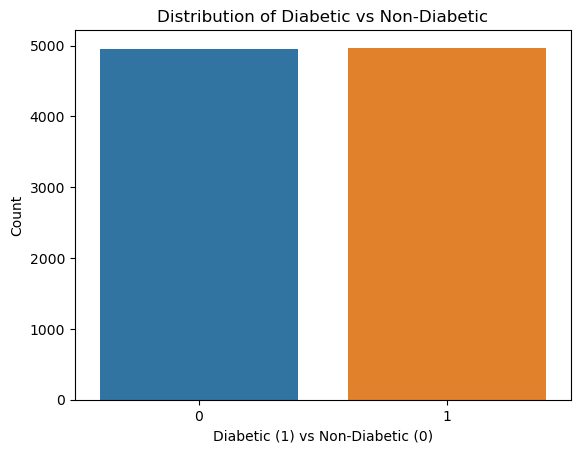

In [28]:
# target distribution
sns.countplot(x=y_resampled)
plt.title('Distribution of Diabetic vs Non-Diabetic')
plt.xlabel('Diabetic (1) vs Non-Diabetic (0)')
plt.ylabel('Count')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [30]:
model_svm = SVC(random_state=42)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_svm.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

c:\Users\loq\anaconda3\envs\tf-gpu-2_10\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [31]:
# metrics for all models
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("XGB Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("RF Classification Report:\n", classification_report(y_test, y_pred_rf))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       989
           1       0.76      0.74      0.75       994

    accuracy                           0.75      1983
   macro avg       0.75      0.75      0.75      1983
weighted avg       0.75      0.75      0.75      1983

XGB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       989
           1       0.91      0.97      0.94       994

    accuracy                           0.94      1983
   macro avg       0.94      0.94      0.94      1983
weighted avg       0.94      0.94      0.94      1983

RF Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       989
           1       0.92      0.97      0.94       994

    accuracy                           0.94      1983
   macro avg       0.94      0.94      0.94  

In [34]:
# save the rf model to pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)